In [22]:
# import osmnx
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

pd.set_option('display.max_columns', None)

In [44]:
venues = pd.read_csv('../data/tables/nyc_2018_r_3_2_20.csv')
boros = gpd.read_file('../data/shapefiles/nyc/boro_bounds.geojson')

subway_routes = gpd.read_file('../data/shapefiles/subway/routes/routes_nyc_subway_may2019.shp')
bus_routes = gpd.read_file('../data/shapefiles/bus/routes/bus_routes_nyc_dec2019.shp')
express_bus_routes = gpd.read_file('../data/shapefiles/bus/express_routes/express_bus_routes_nyc_dec2019.shp')

wgs84 = {'init': 'epsg:4326'}

In [24]:
venues.columns[:5]

Index(['Unnamed: 0', 'gmap_url', 'id', 'Name', 'Street'], dtype='object')

In [25]:
keep_cols = ['id', 'Name', 'lat', 'lon', 'Street', 'Zip', 'District',
               'City', 'Size', 'events_per_month',
               'pedestrianFrequency', 'designOfSpace',
               'promotingEvents', 'popularityOfArtists', 'creativeOutput',
               'experimentationAndDiversity', 'Population...number.of.venues',
               'X24h.licences', 'Events.in.public.space', 'Public.fundings',
               'Accessability', 'pedestrianFrequency_N', 'designOfSpace_N',
               'promotingEvents_N', 'Size_N', 'yearsInOperation_N',
               'popularityOfArtists_N', 'creativeOutput_N',
               'experimentationAndDiversity_N']

In [26]:
venues[keep_cols].head()

,id,Name,lat,lon,Street,Zip,District,City,Size,events_per_month,pedestrianFrequency,designOfSpace,promotingEvents,popularityOfArtists,creativeOutput,experimentationAndDiversity,Population...number.of.venues,X24h.licences,Events.in.public.space,Public.fundings,Accessability,pedestrianFrequency_N,designOfSpace_N,promotingEvents_N,Size_N,yearsInOperation_N,popularityOfArtists_N,creativeOutput_N,experimentationAndDiversity_N
0,1,983,40.703100,-73.933400,983 Flushing Avenue,11206,Brooklyn,New York,3. 301-800 m^2,2-4,2. Good Frequency,2. Not Too Likely,3. Somewhat Likely,2. More Emerging Artists,3. Somewhat Likely,2. Not Too Experimental and/or Diverse,1 venue per 10.000-30.000 inhabitants,somewhat strict,very strict,not too likely,somewhat likely,2.0,2,3,3.0,NaN,2,3,2
1,2,1 OAK,40.743995,-74.006194,453 West 17Th Street New York,10011,Manhattan,New York,3. 301-800 m^2,10+,2. Good Frequency,1. Not At All Likely,2. Not Too Likely,3. Half Emerging / Half Well-Known Artists,2. Not Too Likely,1. Not At All Experimental and/or Diverse,1 venue up to 10.000 inhabitants,very strict,very strict,not too likely,somewhat likely,2.0,1,2,3.0,2.0,3,2,1
2,3,1040 Metropolitan,40.714231,-73.934698,1040 Metropolitan Ave,11211,Brooklyn,New York,4. 801+ m^2,2-4,2. Good Frequency,4. Very Likely,3. Somewhat Likely,2. More Emerging Artists,4. Very Likely,4. Very Experimental and/or Diverse,1 venue per 10.000-30.000 inhabitants,somewhat strict,very strict,not too likely,somewhat likely,2.0,4,3,4.0,2.0,2,4,4
3,4,1896 Studio & Stages,40.708695,-73.924704,215 Ingraham St,11237,Brooklyn,New York,4. 801+ m^2,2-4,2. Good Frequency,4. Very Likely,2. Not Too Likely,4. More Well-Known Artists,3. Somewhat Likely,2. Not Too Experimental and/or Diverse,1 venue per 10.000-30.000 inhabitants,somewhat strict,very strict,not too likely,somewhat likely,2.0,4,2,4.0,NaN,4,3,2
4,5,23 Windows,40.699338,-73.936438,41 Belvidere St,11206,Brooklyn,New York,4. 801+ m^2,0-1,2. Good Frequency,4. Very Likely,4. Very Likely,3. Half Emerging / Half Well-Known Artists,4. Very Likely,4. Very Experimental and/or Diverse,1 venue per 10.000-30.000 inhabitants,somewhat strict,very strict,not too likely,somewhat likely,2.0,4,4,4.0,NaN,3,4,4


In [27]:
geometry = [Point(xy) for xy in zip(venues.lon, venues.lat)]
df = venues.drop(['lon', 'lat'], axis=1)
gdf = gpd.GeoDataFrame(df, crs=wgs84, geometry=geometry)

boros_stateplane = boros.to_crs("EPSG:2263")
gdf_stateplane = gdf.to_crs("EPSG:2263")

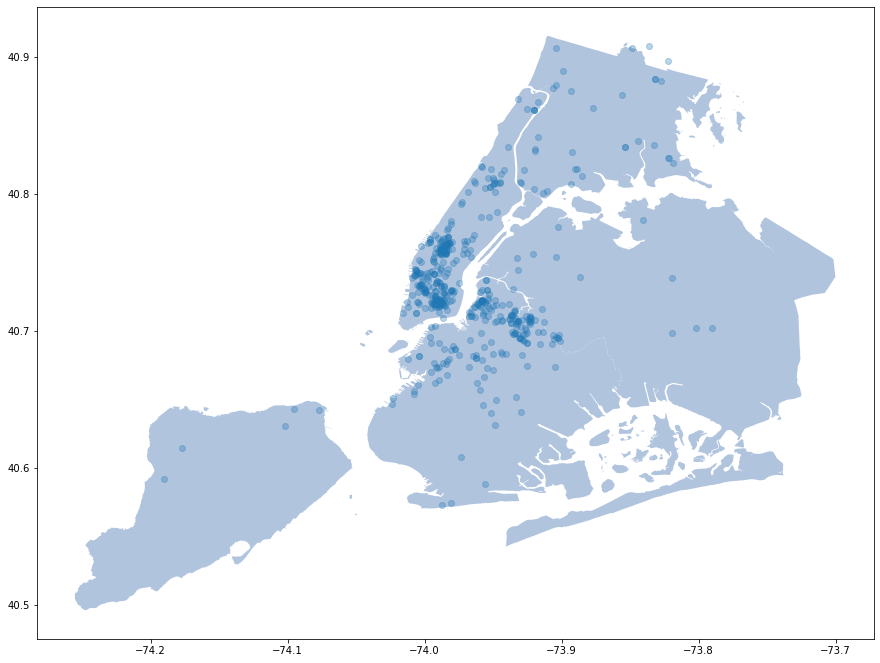

In [46]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_aspect('equal')

boros.plot(ax=ax, color='lightsteelblue')

gdf.plot(ax=ax, alpha=0.3)

plt.show();

#### Fig. 1 Location of nightlife venues identified by Creative Footprint analysis (WGS84)

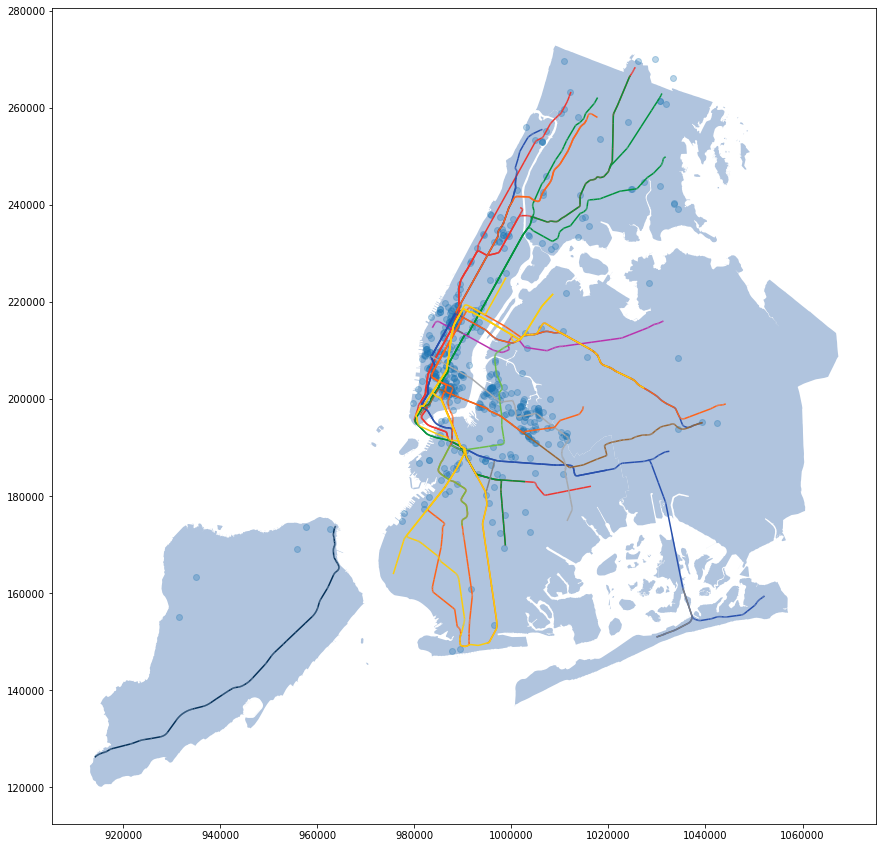

In [39]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_aspect('equal')

boros_stateplane.plot(ax=ax, color='lightsteelblue')

subway_routes.plot(ax=ax, color=subway_routes['color']);

gdf_stateplane.plot(ax=ax, alpha=0.3)

plt.show();

#### Fig. 2 Subway routes & nightlife venues

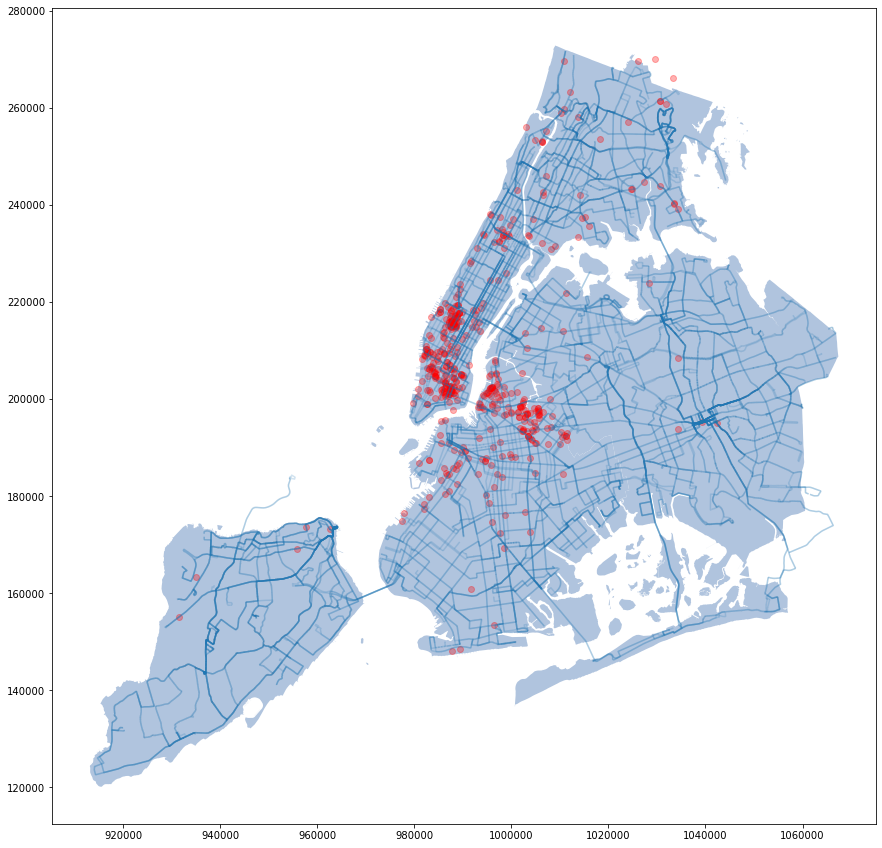

In [43]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_aspect('equal')

boros_stateplane.plot(ax=ax, color='lightsteelblue')

bus_routes.plot(ax=ax, alpha=0.2);

gdf_stateplane.plot(ax=ax, color='red', alpha=0.3)

plt.show();

#### Fig. 3 Bus routes & nightlife venues

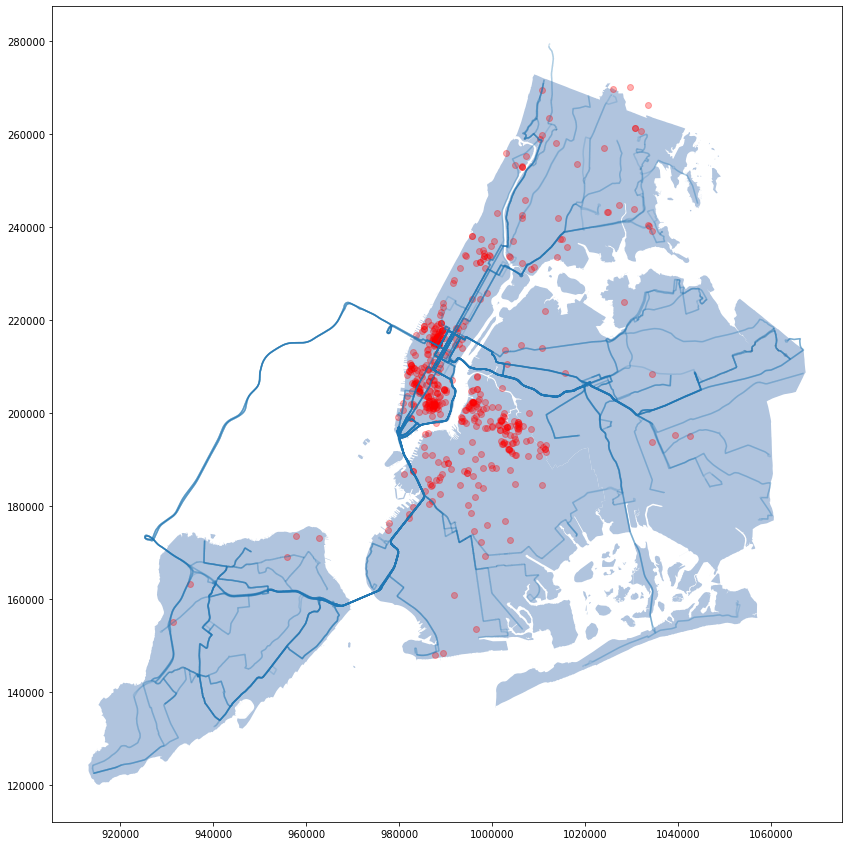

In [45]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_aspect('equal')

boros_stateplane.plot(ax=ax, color='lightsteelblue')

express_bus_routes.plot(ax=ax, alpha=0.2);

gdf_stateplane.plot(ax=ax, color='red', alpha=0.3)

plt.show();

#### Fig. 4 Express bus routes & nightlife venues

In [52]:
gdf.to_file("../data/shapefiles/venues/creative_footprint_data.geojson", driver='GeoJSON')


In [50]:
!pwd

/Users/nicholaslicalzi/cusp_capstone/notebooks
